## Problem Statement:

I have done explorary data Analysis on "Iris" dataset from the UCI Machine Learning Repository.
I have used Matplotlib, a popular data visualization library in Python. You will practice creating different types of visualizations such as line plots, scatter plots, histograms, bar charts, and heatmaps using Matplotlib.



### Tasks:

###### 1. Import the necessary libraries: Start by importing the required libraries, including Matplotlib, NumPy, and pandas.

In [41]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


###### 2. Load the dataset: Load the Iris dataset(load_iris) from sklearn.datasets convert it into a pandas DataFrame. The dataset contains 150 rows and 5 columns (4 features and 1 target variable).

In [42]:
iris_data = load_iris()

In [43]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [44]:
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
# Add targetName column by mapping with target number
dataFrameIris = np.concatenate((iris_data.data,iris_data.target[:,None]),axis =1)
dataFrameIris = pd.DataFrame(dataFrameIris, columns = iris_data.feature_names + ['Target'])
mapped = dict(zip([0,1,2], iris_data.target_names))
dataFrameIris.loc[:,'TargetNames'] = dataFrameIris.Target.map(mapped)

In [46]:
dataFrameIris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,TargetNames
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [47]:
# Rename the columns in camel case format, to implement graphs.
# NOTE: it was giving error while ploting scattered plot with column name having (cm)
dataFrameIris = dataFrameIris.rename(columns={'sepal length (cm)': 'sepalLength'})
dataFrameIris = dataFrameIris.rename(columns={'sepal width (cm)': 'sepalWidth'})
dataFrameIris = dataFrameIris.rename(columns={'petal length (cm)': 'petalLength'})
dataFrameIris = dataFrameIris.rename(columns={'petal width (cm)': 'petalWidth'})

In [48]:
dataFrameIris.head(5)

,sepalLength,sepalWidth,petalLength,petalWidth,Target,TargetNames
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [49]:
dataFrameIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   Target       150 non-null    float64
 5   TargetNames  150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


###### 3. Line Plot: Create a line plot to visualize the trend in the data over time. Since this is not a time-series dataset, create a line plot for each feature against the target variable (species). Customize the plot by adding a title, labels for the x and y-axis, and a legend.

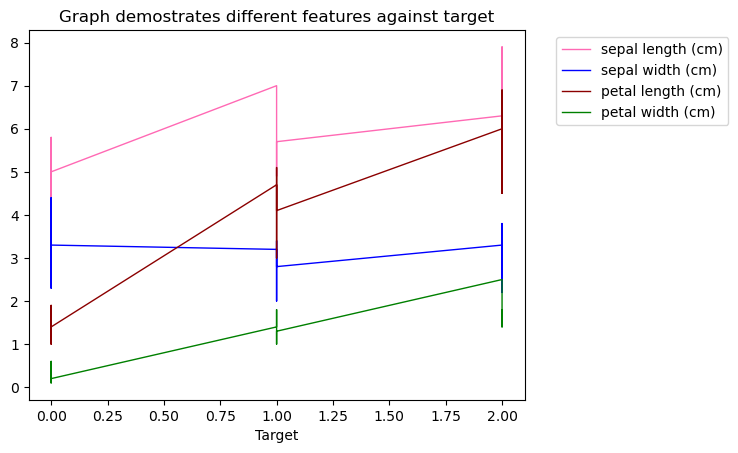

In [50]:
# multiple line graphs between different features against target
y1 = dataFrameIris["sepalLength"]
y2 = dataFrameIris["sepalWidth"]
y3 = dataFrameIris["petalLength"]
y4 = dataFrameIris["petalWidth"]
x = dataFrameIris["Target"]

plt.plot(x,y1,c = 'hotpink', linewidth = '1',label='sepal length (cm)')
plt.plot(x,y2,c = 'blue', linewidth = '1',label='sepal width (cm)')
plt.plot(x,y3,c = 'darkred', linewidth = '1',label='petal length (cm)')
plt.plot(x,y4,c = 'green', linewidth = '1',label='petal width (cm)')

plt.title("Graph demostrates different features against target", color = "black")
plt.xlabel("Target")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

###### 4. Scatter Plot: Create a scatter plot to visualize the relationship between two variables. Create scatter plots for each pair of features, and color the points by species. Customize the plot by adding a title, labels for the x and y-axis, and a legend.

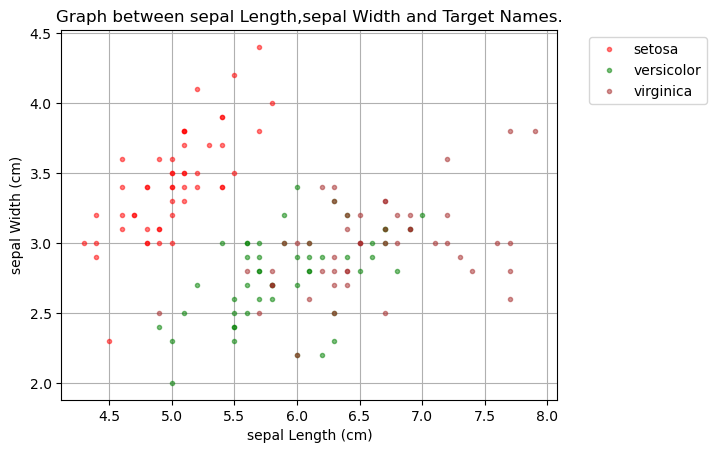

In [51]:
fig, ax = plt.subplots()
color = ['red', 'green',"brown"] # set color of legend points

count = 0
for name, group in dataFrameIris.groupby('Target'):
    ax.plot(group.sepalLength, group.sepalWidth, '.', 
                           label = iris_data.target_names[int(name)], alpha = 0.5, 
                           c = color[count])
    count += 1

# set legend
ax.legend(numpoints=1, title = "", fontsize = 10,bbox_to_anchor=(1.05, 1.0), loc='upper left')

# set axis labels 
plt.xlabel('sepal Length (cm)')
plt.ylabel('sepal Width (cm)')
plt.title('Graph between sepal Length,sepal Width and Target Names.')
ax.grid(True)  # display grid view
plt.show(fig) 

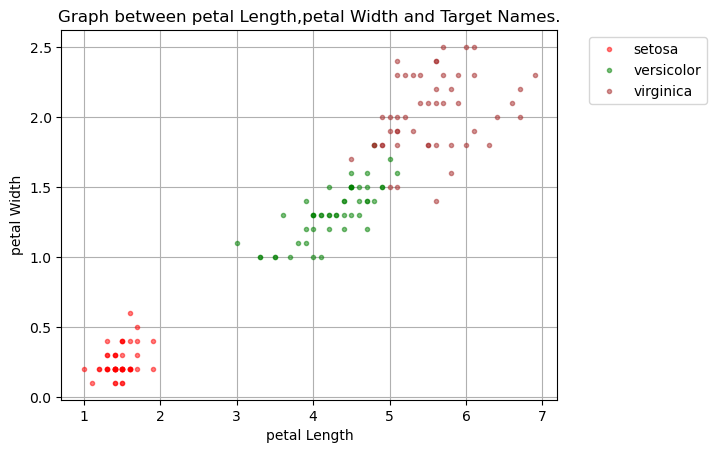

In [52]:
fig, ax = plt.subplots()
color = ['red', 'green',"brown"] # set color of legend points

count = 0
for name, group in dataFrameIris.groupby('Target'):
    ax.plot(group.petalLength, group.petalWidth, '.', 
                           label = iris_data.target_names[int(name)], alpha = 0.5, 
                           c = color[count])
    count += 1

# set legend
ax.legend(numpoints=1, title = "", fontsize = 10,bbox_to_anchor=(1.05, 1.0), loc='upper left')

# set axis labels 
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('Graph between petal Length,petal Width and Target Names.')
ax.grid(True)  # display grid view
plt.show(fig) 

###### 5. Histogram: Create a histogram to visualize the distribution of a single variable. Create histograms for each feature, and color the bars by species. Customize the plot by adding a title, labels for the x and y-axis, and setting the number of bins.

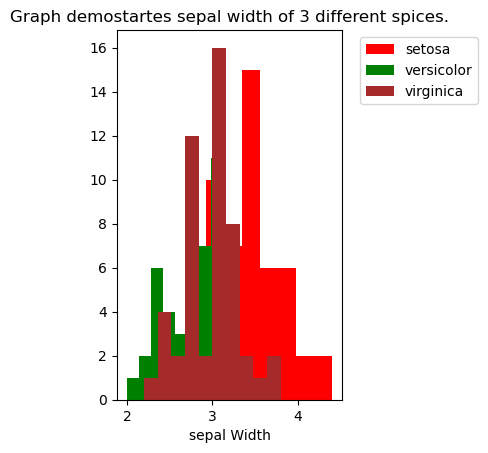

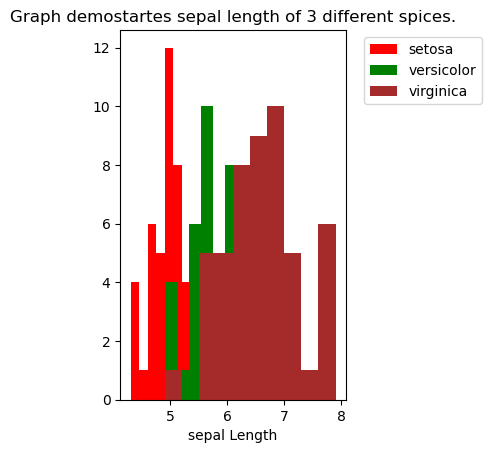

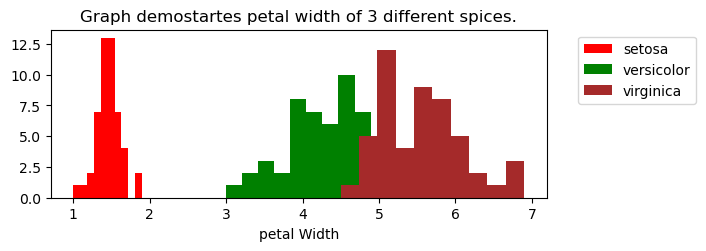

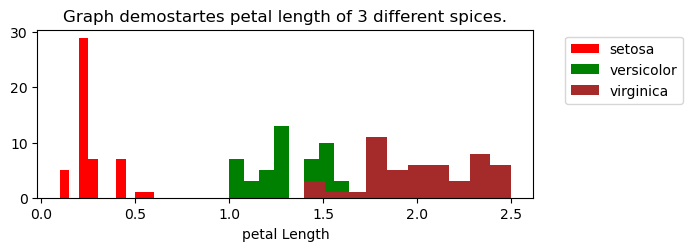

In [53]:
color = ['red', 'green',"brown"] # set color of legend points

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 2, 2)

fig3 = plt.figure()
ax3 = fig3.add_subplot(2, 1, 1)

fig4 = plt.figure()
ax4 = fig4.add_subplot(2, 1, 2)

count = 0
for name, group in dataFrameIris.groupby('Target'):
    ax1.hist(group.sepalWidth, 
                           label = iris_data.target_names[int(name)],
                           color = color[count])
    ax2.hist(group.sepalLength, 
                           label = iris_data.target_names[int(name)],
                           color = color[count])
    ax3.hist(group.petalLength, 
                           label = iris_data.target_names[int(name)],
                           color = color[count])
    
    ax4.hist(group.petalWidth, 
                           label = iris_data.target_names[int(name)],
                           color = color[count])
    count += 1

# set legend
ax1.legend(numpoints=1, title = "", fontsize = 10,bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.set_xlabel('sepal Width')
ax1.set_title('Graph demostartes sepal width of 3 different spices.')


ax2.legend(numpoints=1, title = "", fontsize = 10,bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax2.set_xlabel('sepal Length')
ax2.set_title('Graph demostartes sepal length of 3 different spices.')

ax3.legend(numpoints=1, title = "", fontsize = 10,bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax3.set_xlabel('petal Width')
ax3.set_title('Graph demostartes petal width of 3 different spices.')

ax4.legend(numpoints=1, title = "", fontsize = 10,bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax4.set_xlabel('petal Length')
ax4.set_title('Graph demostartes petal length of 3 different spices.')

plt.show(fig1) 
plt.show(fig2) 
plt.show(fig3) 
plt.show(fig4) 

###### 6. Bar Chart: Create a bar chart to visualize the frequency or count of a categorical variable. Create a bar chart for the target variable (species), showing the count of each species. Customize the plot by adding a title, labels for the x and y-axis, and changing the color scheme.


In [54]:
dataFrameIris[['TargetNames']].value_counts()

TargetNames
setosa         50
versicolor     50
virginica      50
dtype: int64

[Text(0.5, 1.0, 'Count Number of species')]

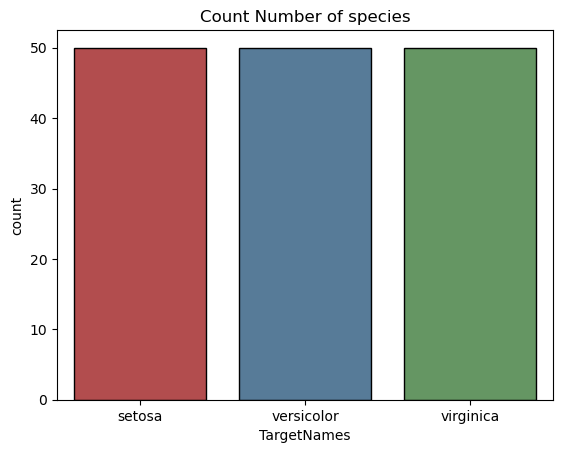

In [55]:
sns.countplot(x='TargetNames',data=dataFrameIris,
              saturation = .5,edgecolor = "black",palette = "Set1").set(
    title="Count Number of species")

###### 7. Heatmap: Create a heatmap to visualize the correlation between multiple variables. Create a heatmap showing the correlation matrix between the features. Customize the plot by adding a title and changing the color scheme.

In [56]:
FeaturesCorr = dataFrameIris[['sepalLength','sepalWidth','petalLength','petalWidth']].corr()

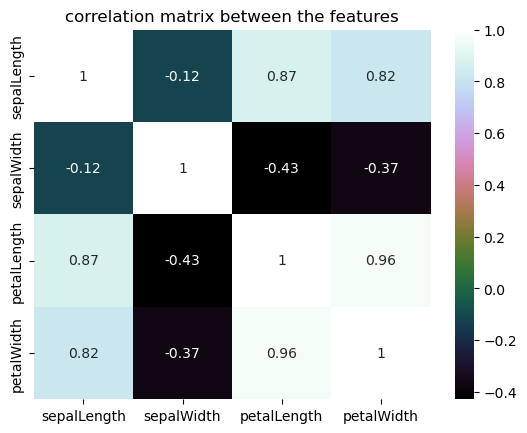

In [57]:
sns.heatmap(FeaturesCorr, cmap="cubehelix", annot=True)
plt.title("correlation matrix between the features")
plt.show()